Max Wang

PHYS 434 AB

Partner: Alexander Hyde

# Lab 1

Lab 1 serves as an introduction to continuous and discrete analytic distribution as well as translating "sigma" from statistics to physics.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math 
from scipy import stats

## Gaussian Distribution

We begin the lab by looking at normal distribution, also known as Gaussian distribution. Below is a basic Gaussian distribution plot centered around mean of 0, STD of 1 and a random sample of 100k. Usually with physical data, there won't always be a nice bell shape. Hence, in order to know of the data has Gaussian statistics, the y-values should be scaled with logarithmic. As you can see, it follows a parabolic distribution, meaning the data is indeed Gaussian.

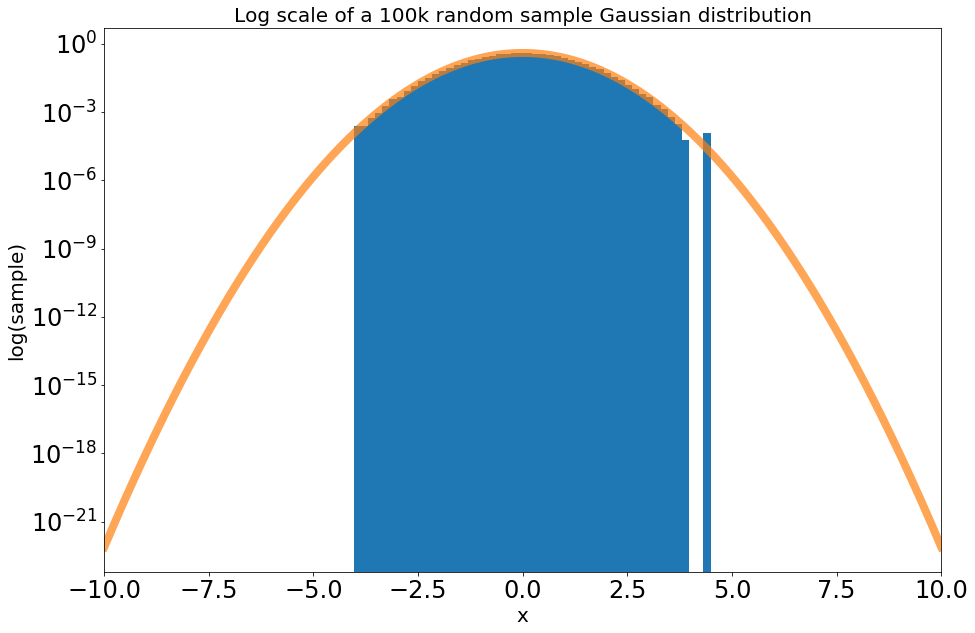

In [3]:
sample = stats.norm.rvs(0,1,100000)
fig, ax = plt.subplots(1, 1)
plt.rcParams["figure.figsize"] = (15,10)
ax.hist(sample,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([-10, 10])
plt.yscale('log')
plt.ylabel('log(sample)', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.title('Log scale of a 100k random sample Gaussian distribution', fontsize=20)

x = np.linspace(-10, 10, 1000)
ax.plot(x,stats.norm.pdf(x,loc = 0, scale = 1),linewidth = 8,alpha = 0.7)
plt.show()

"Sigma" refers to a probability in physics. The conversion involves taking the integral of a standard normal distribution, which is a Gaussian centered around mean of 0 and STD of 1 like the plot above. In code, this is done using <code>stats.norm.cdf()</code>, and below are example outputs using various z-values. Note that the integral is always taken from left to right, and the integral of the entire distribution is 1. However, we instead want to look at the integral taken from <code>x</code> to positive infinite, so we do <code>1 - cdf()</code>.

In [4]:
z = [-1, 0, 0.5, 1, 1.5, 2, 5]
for x in z:
    print(1 - stats.norm.cdf(x, 0 , 1))

0.8413447460685429
0.5
0.3085375387259869
0.15865525393145707
0.06680720126885809
0.02275013194817921
2.866515719235352e-07


If we want to revert the conversion, i.e. from probability to sigma, then we would use <code>stats.norm.ppf()</code>. Notice that if the probability is  less than 0.5, sigma becomes negative. In the context of this lab involving signals, this means that it's highly probably that the signal obtain is due to background noise.

In [5]:
z = [-1, 0, 0.5, 1, 1.5, 2, 5]
for x in z:
    print(stats.norm.ppf(stats.norm.cdf(x, 0 , 1)))


-1.0
0.0
0.5000000000000001
1.0
1.4999999999999996
2.0000000000000004
4.999999999970176


## Rayleigh Distribution

I chose to analyze Rayleigh distribution out of the several continuous distribution from the list. Rayleigh is a special case of chi distribution, with <code>df = 2</code>. Unlike Gaussian distribution, Rayleigh distribution has a non-negative domain <code>(x >= 0)</code>. Below is a Rayleigh distribution plot centered at 0 and random sample of 100k, scaled logarithmatically.

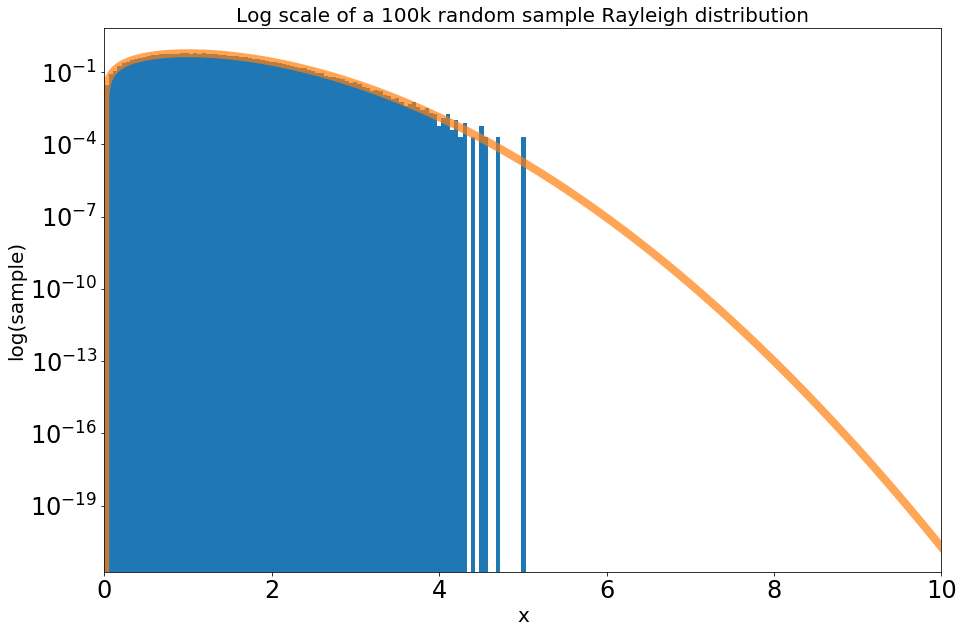

In [6]:
sample = stats.rayleigh.rvs(0,1,100000)
fig, ax = plt.subplots(1, 1)
ax.hist(sample,100, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0, 10])
plt.yscale('log')
plt.ylabel('log(sample)',fontsize=20)
plt.xlabel('x', fontsize=20)
plt.title('Log scale of a 100k random sample Rayleigh distribution', fontsize=20)
x = np.linspace(0, 10, 1000)
ax.plot(x,stats.rayleigh.pdf(x,0,1),linewidth = 8,alpha = 0.7)
plt.show()

Say hypotically, my observed value was <code>x = 5</code>, and I would like to know the "sigma" associated with my <code>x</code>. We would be answering the following question:

If my data has a Gaussian distribution, what is the probability that my observed value of 5 was result of background noise?

In [7]:
#choosing observed = 5
#probability of observed:
obs_prob = stats.rayleigh.cdf(5, 0 , 1)
print('Probability of observed value is ' + str(1 - obs_prob))
#convert probability to sigma:
sigma = stats.norm.ppf(obs_prob, 0, 1)
print('Sigma of observed probability is ' + str(sigma))
stats.norm.ppf(obs_prob, 0, 1)

Probability of observed value is 3.7266531720536733e-06
Sigma of observed probability is 4.4803146987717914


4.4803146987717914

## Binomial Distribution

In physics, there are many instances were the data is discrete. Hence we will also explore non-continuous distributions. Out of the two, I chose Binomial. This distribution models the probability of <code>k</code> times of success in <code>n</code> trials, given that each success has a probability of <code>p</code>. Below I plotted three Binomial distributions with <code>n = 100</code> and varying <code>p = 0.25, 0.5</code> and <code>0.75</code>, scaled logarithmically. We can see that the distribution is centered around <code>n * p</code>.

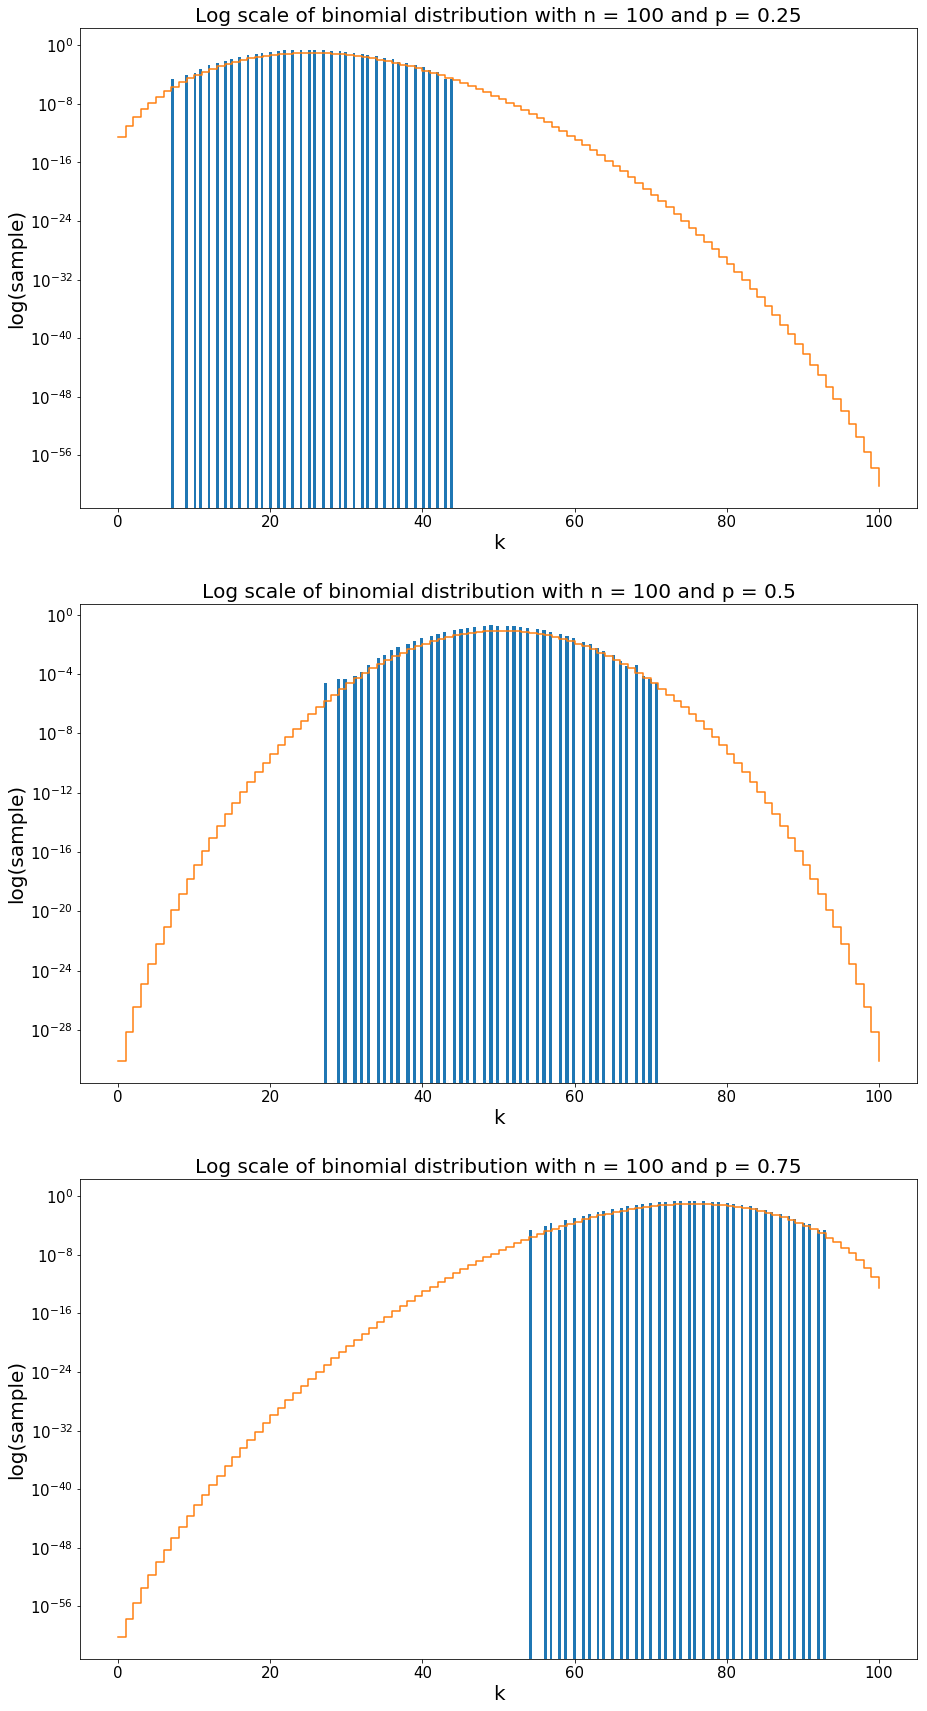

In [8]:
n = 100
p = [0.25, 0.5, 0.75]
fig, ax = plt.subplots(3,figsize=(15,30))
for i in range(len(p)):
    sample = stats.binom.rvs(n,p[i],0,100000)
    ax[i].hist(sample,101,density=True)
    ax[i].tick_params(labelsize = 15)
    ax[i].set_yscale('log')
    ax[i].set_ylabel('log(sample)',fontsize=20)
    ax[i].set_xlabel('k',fontsize=20)
    ax[i].set_title('Log scale of binomial distribution with n = 100 and p = ' + str(p[i]),fontsize=20)
    x = np.linspace(0,100,101)
    ax[i].step(x,stats.binom.pmf(x,n,p[i]),where='post')
plt.show()

Let's pick <code>p = 0.75</code> to analyze. Picking various <code>k</code> values, I converted them to "sigma". As you can see, since the data is discrete, any <code>k</code> that is between 60 and 61 will have the same sigma as 60. If hypothetically, our observed value was <code>k = 60</code>, and if we were to answer the question:

If my data has a Gaussian distribution, what is the probability that my observation of 60 successes in 100 trials was the result of background noise?

The answer would be the probability of -3.2 sigmas away from the Gaussian mean.

In [9]:
x = [60, 60.3, 60.5, 60.7, 61, 75, 82]
for i in x:
    prob = stats.binom.cdf(i, n, 0.75)
    sigma = stats.norm.ppf(prob,0,1)
    print('At k = ' + str(i) + ', the probability is: ' + 
          str(1 - prob) + ', and its associated sigma is: ' + str(sigma))

At k = 60, the probability is: 0.999313407792037, and its associated sigma is: -3.200228988981005
At k = 60.3, the probability is: 0.999313407792037, and its associated sigma is: -3.200228988981005
At k = 60.5, the probability is: 0.999313407792037, and its associated sigma is: -3.200228988981005
At k = 60.7, the probability is: 0.999313407792037, and its associated sigma is: -3.200228988981005
At k = 61, the probability is: 0.9986000436117506, and its associated sigma is: -2.9888917857723096
At k = 75, the probability is: 0.46167113208141075, and its associated sigma is: 0.09622451101661549
At k = 82, the probability is: 0.037626263701184604, and its associated sigma is: 1.778922142192875
